# PCA

* PCA (or principal component analysis) is the first of the techniques you will see aimed at dimensionality reduction. This technique is about taking your full dataset and reducing it to only the parts that hold the most information.

# How deep will these notes go?

### The goal is to leave this lesson with an understanding of:
1. How PCA is used in the world
2. How to perform PCA in python
3. A conceptual understanding of how the algorithm works.
4. How to interpret the results of PCA.

If you want to dive deeper into the mathematics, there will be additional links provided, but it will not be a main focus of this lesson.

# PCA Lesson Topics

There is a lot to cover with Principal Component Analysis (or PCA). However, you will gain a solid understanding of PCA by the end of this lesson, by applying this technique in a couple of scenarios using scikit-learn, and practicing interpreting the results.

We will also cover conceptually how the algorithm works, and I will provide links to explore what is happening mathematically in case you want to dive in deeper! Here is an outline of what you can expect in this lesson.

### 1. Dimensionality Reduction through Feature Selection and Feature Extraction
With large datasets we often suffer with what is known as the "curse of dimensionality," and need to reduce the number of features to effectively develop a model. Feature Selection and Feature Extraction are two general approaches for reducing dimensionality.

### 2. Feature Extraction Using PCA
Principal Component Analysis is a common method for extracting new "latent features" from our dataset, based on existing features

### 3. Fitting PCA
In this part of the lesson, you will use PCA in scikit-learn to reduce the dimensionality of images of handwritten digits.

### 4. Interpretting Results
Once you are able to use PCA on a dataset, it is essential that you know how to interpret the results you get back. There are two main parts to interpreting your results - the principal components themselves and the variability of the original data captured by those components. You will get familiar with both.

### 5. Mini-Project
Finally, you will put your skills to work on a new dataset

### 6. Quick Recap
We will do a quick recap, and you will be ready to use PCA for your own applications, as well as the project!

## Latent Features

<img src='lat_feat1.png' width=400px>
<img src='lat_feat2.png' width=400px>

Latent features are features that aren't explicitly in your dataset.

In this example, you saw that the following features are all related to the latent feature **home size**:

1. lot size
2. number of rooms
3. floor plan size
4. size of garage
5. number of bedrooms
6. number of bathrooms

Similarly, the following features could be reduced to a single latent feature of **home neighborhood**:

1. local crime rate
2. number of schools in five miles
3. property tax rate
4. local median income
5. average air quality index
6. distance to highway

So even if our original dataset has the 12 features listed, we might be able to reduce this to only 2 latent features relating to the home size and home neighborhood.

#### How do these statements group?
<img src='lat_feat3.png' width=600px>

**Maybe like this**

<img src='lat_feat4.png' width=600px>

# Reducing the Number of Features - Dimensionality Reduction

Our real estate example is great to help develop an understanding of feature reduction and latent features. But we have a smallish number of features in this example, so it's not clear why it's so necessary to reduce the number of features. And in this case it wouldn't actually be required - we could handle all six original features to create a model.

But the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) becomes more clear when we're grappling with large real-world datasets that might involve hundreds or thousands of features, and to effectively develop a model really requires us to reduce our number of dimensions.

## Two Approaches: Feature Selection and Feature Extraction
### Feature Selection
Feature Selection involves finding a **subset** of the original features of your data that you determine are most relevant and useful. In the example image below, taken from the video, notice that "floor plan size" and "local crime rate" are features that we have selected as a subset of the original data.
<img src='feat_sel1.png' width=600px>

#### Methods of feature selection
* Filter Methods:
Filtering approaches use a ranking or sorting algorithm to filter out those features that have less usefulness. Filter methods are based on discerning some inherent correlations among the feature data in unsupervised learning, or on correlations with the output variable in supervised settings. Filter methods are usually applied as a preprocessing step. Common tools for determining correlations in filter methods include: **Pearson's Correlation**, **Linear Discriminant Analysis (LDA)**, and **Analysis of Variance (ANOVA)**

* Wrapper Methods:
Wrapper approaches generally select features by directly testing their impact on the performance of a model. The idea is to "wrap" this procedure around your algorithm, repeatedly calling the algorithm using different subsets of features, and measuring the performance of each model. Cross-validation is used across these multiple tests. The features that produce the best models are selected. Clearly this is a computationally expensive approach for finding the best performing subset of features, since they have to make a number of calls to the learning algorithm. Common examples of wrapper methods are: **Forward Search**, **Backward Search**, and **Recursive Feature Elimination**.

**Scikit-learn** has a [feature selection module](https://scikit-learn.org/stable/modules/feature_selection.html) that offers a variety of methods to improve model accuracy scores or to boost their performance on very high-dimensional datasets.

### Feature Extraction
Feature Extraction involves extracting, or constructing, new features called **latent features**. In the example image below, taken from the video, "Size Feature" and "Neighborhood Quality Feature" are new latent features, extracted from the original input data.
<img src='feat_ext1.png' width=600px>
#### Methods of feature extraction
Constructing latent features is exactly the goal of **Principal Component Analysis (PCA)**, which we'll explore throughout the rest of this lesson.

Other methods for accomplishing Feature Extraction include **Independent Component Analysis (ICA)** and **Random Projection**, which we will study in the following lesson.

### Further Exploration
If you're interested in deeper study of these topics, here are a couple of helpful blog posts and a research paper:
* https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/
* https://elitedatascience.com/dimensionality-reduction-algorithms
* http://www.ai.mit.edu/projects/jmlr/papers/volume3/guyon03a/source/old/guyon03a.pdf

# Principal Components
Given data:
<img src='pca1.png' width=600px>
We can shrink the data in two dimensions into this line:
<img src='pca2.png' width=600px>
Which is very similar to regression, but we're not using this for prediction:
<img src='pca3.png' width=600px>
The goal in the above is to shrink the space that our data lives in

`1.` An advantage of Feature Extraction over Feature Selection is that the latent features can be constructed to incorporate data from multiple features, and thus retain more information present in the various original inputs, than just losing that information by dropping many original inputs.

`2.` **Principal components** are linear combinations of the original features in a dataset that aim to retain the most information in the original data.

`3.` You can think of a **principal component** in the same way that you think about a **latent feature**

The general approach to this problem of high-dimensional datasets is to search for a **projection** of the data onto a smaller number of features which preserves the information as much as possible.

We'll take a closer look in the rest of this lesson.

# Principal Component Properties
There are two main properties of principal components:

`1.` **They retain the most amount of information in the dataset.** In this video, you saw that retaining the most information in the dataset meant finding a line that reduced the distances of the points to the component across all the points (same as in regression!).

`2.` **The created components are orthogonal to one another.** So far we have been mostly focused on what the first component of a dataset would look like. However, when there are many components, the additional components will all be orthogonal to one another. Depending on how the components are used, there are benefits to having orthogonal components. In regression, we often would like independent features, so using the components in regression now guarantees this.

[A great answer about common PCA questions](https://stats.stackexchange.com/questions/110508/questions-on-pca-when-are-pcs-independent-why-is-pca-sensitive-to-scaling-why)

<img src='pca_prop1.png' width=600px>
By choosing components that span the largest variance in the dataset, you lose the least amount of information

<img src='pca_prop2.png' width=600px>
The amount of information lost is the sum of the distances from the points to the line; the component on the right loses less information than the one on the right

<img src='pca_prop3.png' width=600px>
The components must have 90-degrees between them, note that orthogonality indicates independence

_______________

Some short items about PCA
<img src='pca_quiz1.png' width=600px>

PCA is commonly used with high dimensional data.  One type of high dimensional data is images. In this example, I will show you a similar use case using images of numbers.

A classic example of working with image data is the MNIST dataset, which was open sourced in the late 1990s by researchers across Microsoft, Google, and NYU.  I have linked more information about the dataset below this video in the workbook:  http://yann.lecun.com/exdb/mnist/

To get started, let's import the libraries we will need for the rest of the notebook.

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The dataset has 42,000 images in the training dataset, and another 28,000 images in a test set.  Let's read in the datasets and see what they look like.  If you would like to follow along with me, you can open the workspace below this video in another window and work along with me.  Let's take a closer look at the data.

In [4]:
train = pd.read_csv('./data/train.csv')
train.fillna(0, inplace=True)

Loading the data may take a bit of time, but once it is loaded, we will focus on the training dataset. 

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
label,6304.0,4.440355,2.885613,0.0,2.0,4.0,7.0,9.0
pixel0,6304.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel1,6304.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,6304.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,6304.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel4,6304.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel5,6304.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel6,6304.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel7,6304.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel8,6304.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


From a header and the describe of the data, we can see that the data has a label column with what digit was created, and the pixels for each part of the image are the features.  The values for the pixels are between 0 and 255.  You can find an article on the pixel values in the article below in the notebook. https://homepages.inf.ed.ac.uk/rbf/HIPR2/value.htm

Given what we know about the data, let's split the label off and put the images in their own matrix.

In [7]:
# save the labels to a Pandas series target
y = train['label']
# Drop the label feature
X = train.drop("label",axis=1)

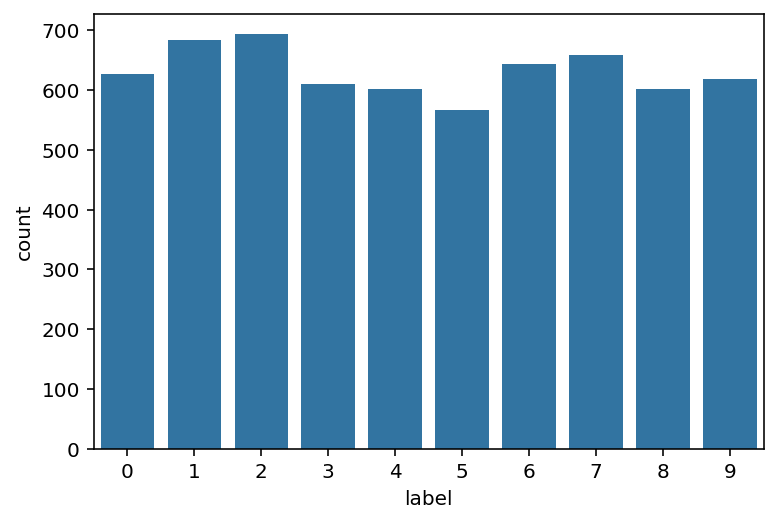

In [8]:
sns.countplot(y, color = sns.color_palette()[0]); #a very quick look at the data shows that all the labels appear roughly 4k times

Let's take a look at what a few of the numbers look like with this little helper function. 

In [9]:
def show_images(num_images):
    '''
    This function plots the num_images provided of MNIST dataset. 
    
    INPUT: num_images - int - The number of images you would like to view.
           Mod 10 of num_images should be 0 and it should be fewer than 101 images.
    OUTPUT: A figure with the images shown for the training data.
    '''
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images): 
            plt.subplot(num_images/10,10,digit_num+1) #create subplots
            mat_data = X.iloc[digit_num].as_matrix().reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
    else:
        print('That is not the right input, please read the docstring before continuing.')

/Users/daiglechris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


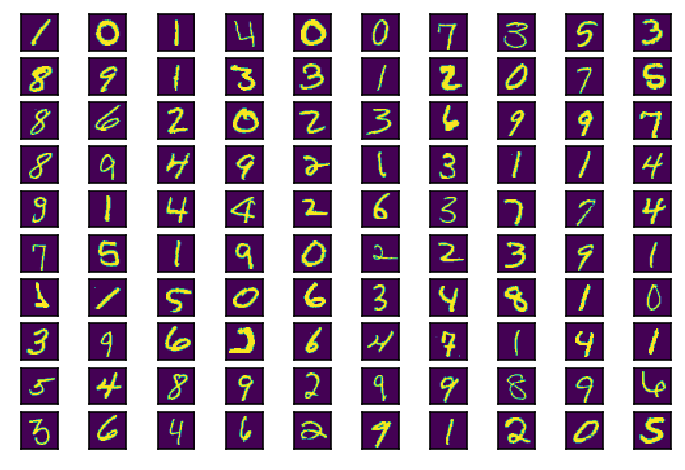

In [10]:
show_images(100)

Some of these look pretty easy to identify, and others not so much... I wrote another helper function to be able to see each of the first 50 images of any one type of number.

In [11]:
def show_images_by_digit(digit_to_see):
    '''
    This function plots the digits_to_see provided of MNIST dataset. 
    
    INPUT: digits_to_see - int - A number between 0 and 9 of what you want to see.
    OUTPUT: A figure with the images shown for the training data.
    '''
    if digit_to_see in list(range(10)):
        indices = np.where(y == digit_to_see) # pull indices for num of interest
        for digit_num in range(0,50): 
            plt.subplot(5,10, digit_num+1) #create subplots
            mat_data = X.iloc[indices[0][digit_num]].as_matrix().reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis   
    else:
        print('That is not the right input, please read the docstring before continuing.')

/Users/daiglechris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


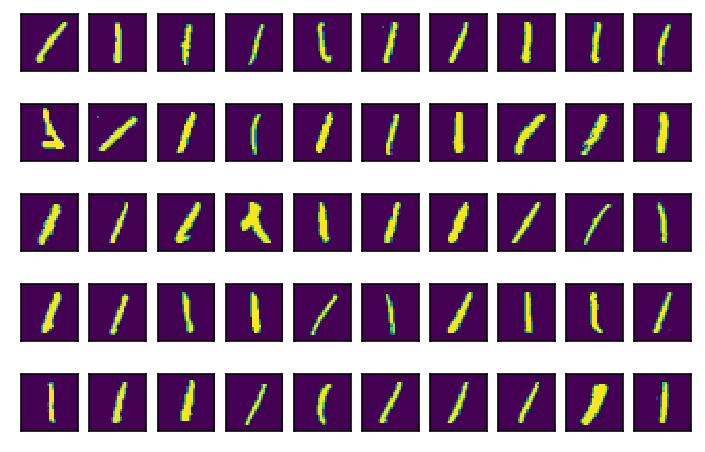

In [12]:
show_images_by_digit(1)

Some of these ones are pretty wild looking...  One common way to use PCA is to reduce the dimensionality of high dimensionality data that you want to use for prediction, but the results seem to be overfitting (potentially because their is a lot of noise in the data.  Which can certainly be the case with image data).

Let's take a first pass on creating a simple model to predict the values of the images using all of the data.

[[200   0   1   0   0   0   6   0   2   0]
 [  0 234   1   0   0   2   2   2   2   0]
 [  3   5 213   0   1   0   1   4   0   1]
 [  5   0   5 172   0   5   0   0   1   3]
 [  0   0   0   0 170   0   4   0   0   4]
 [  3   2   0   3   2 171   2   1   2   0]
 [  1   0   2   0   0   3 203   0   1   1]
 [  0   0   6   0   5   0   1 208   2   3]
 [  0   1   2   4   0   3   0   0 189   3]
 [  2   1   0   2  13   1   0   1   4 184]]
AxesSubplot(0.125,0.125;0.62x0.755)
0.9341662662181643


0.9341662662181643

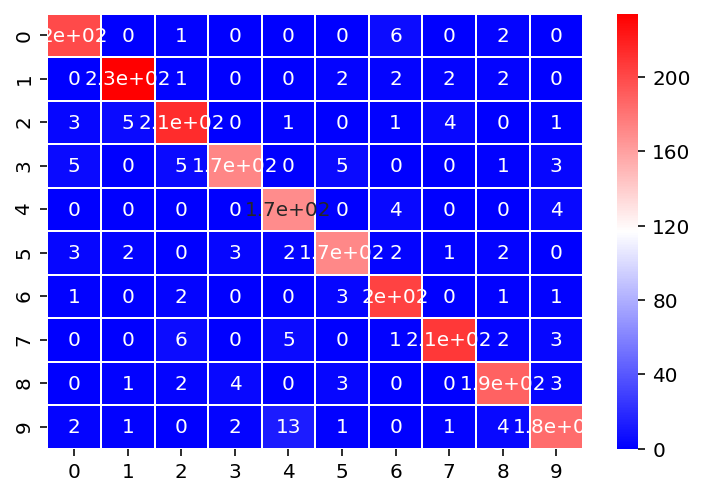

In [13]:
#Because we will fit this more than once, might as well make a function
def fit_random_forest_classifier(X, y):
    '''
    INPUT: names are pretty self explanatory
    OUTPUT: none - prints the confusion matrix and accuracy
    '''
    #First let's create training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    #We could grid search and tune, but let's just fit a simple model to see how it does
    #instantiate
    clf = RandomForestClassifier(n_estimators=100, max_depth=None)

    #fit
    clf.fit(X_train, y_train)

    #predict
    y_preds = clf.predict(X_test)

    #score
    mat = confusion_matrix(y_test, y_preds)
    print(mat)
    print(sns.heatmap(mat, annot=True, cmap='bwr', linewidths=.5))
    acc = accuracy_score(y_test, y_preds)
    print(acc)
    return acc
    
fit_random_forest_classifier(X, y)

The above model does pretty well on the test set using all of the data, let's see how we well a model can do with a much lower number of features.  Perhaps, we can do as well or better by reducing the noise in the original features.

Working with unsupervised techniques in scikit learn follows a similar process as working with supervised techniques, but excludes predicting and scoring, and instead we just need to transform our data.  Often the fit and transform are done all in one step.

1. Instantiate
2. Fit 
3. Transform 

It is worth mentioning that because all of our features are on the same scale from 0 to 255, scaling isn't super necessary here.  At the same time, I usually try to create processes that are extendible without having to think and dive into the details again.  Without standardizing, this process would only work for data that was already scaled.

You can use the below function to perform PCA on this dataset, but also any other dataset.

In [14]:
def do_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.
    
    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform
           
    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [15]:
pca, X_pca = do_pca(2, X)

In [16]:
X_pca.shape

(6304, 2)

[[110   0  34  10   8   9  30   0   8   0]
 [  0 207   0   3   1   8   5   8   7   4]
 [ 40   2  68  28  15  22  38   0  12   3]
 [ 13   1  28  21  22  29  28  13  24  12]
 [  5   4  17  21  46  19  16  12  11  27]
 [  7   8  32  22  14  25  26   6  36  10]
 [ 32   5  48  20  12  26  35   3  28   2]
 [  3   3   2   9  30  10   3  95   9  61]
 [  5   7  24  31  21  30  29   9  34  12]
 [  2  14   4  13  35   6   4  56   9  65]]
AxesSubplot(0.125,0.125;0.62x0.755)
0.33925997116770784


0.33925997116770784

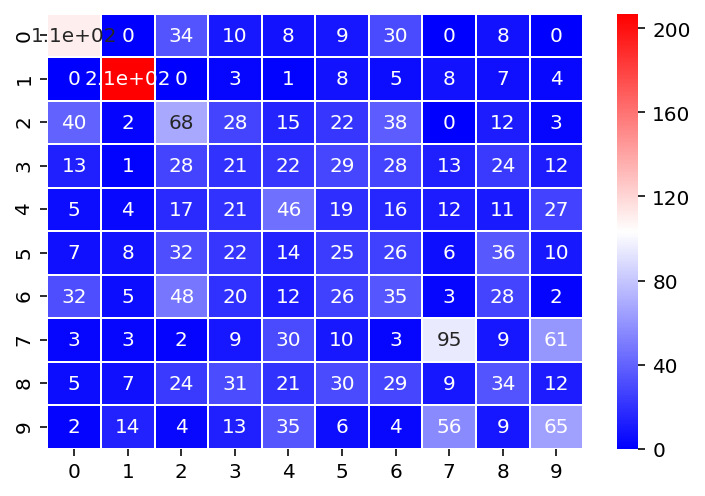

In [17]:
fit_random_forest_classifier(X_pca, y)

So, let's look at the positives first... that was super fast.  But clearly two components isn't giving us enough information to clearly identify the digits.  Let's consider a few more components, and take a closer look at what we know about the components.

In [18]:
pca.components_.shape

(2, 784)

In [19]:
def plot_components(X, y):
    '''
    plots the data in a 2 dimensional space to view separation
    INPUT: pretty straightforward again
    OUTPUT: none
    '''
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])
    

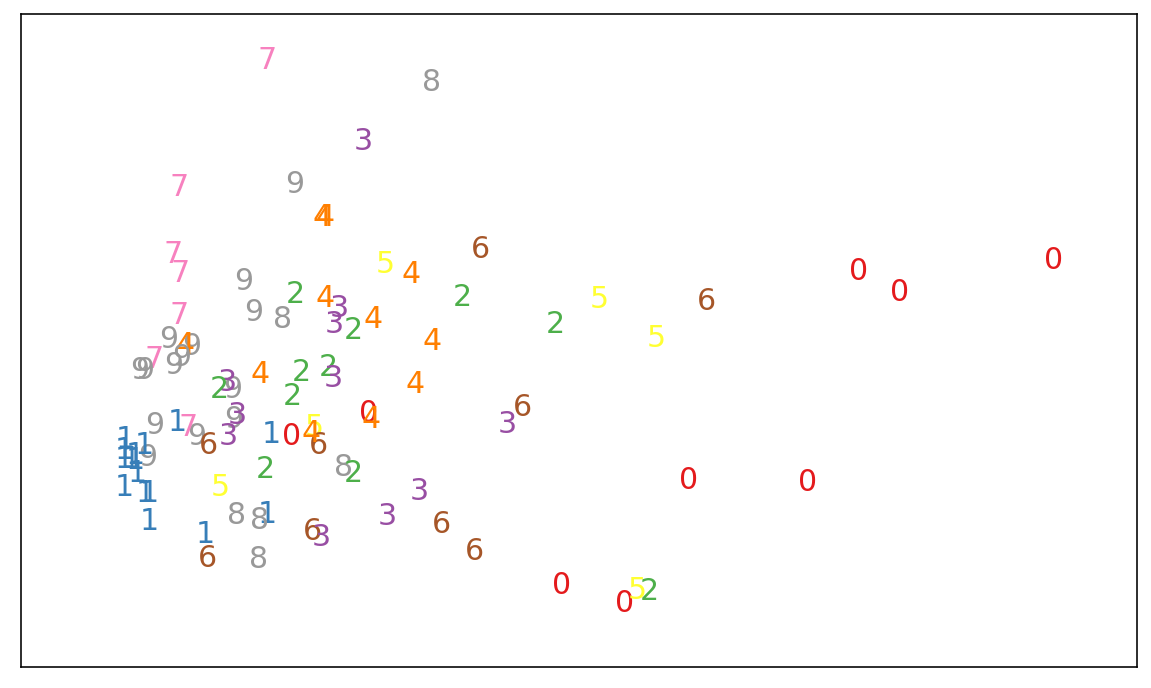

In [20]:
plot_components(X_pca[:100], y[:100])

# Another Example

In [28]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from helper_functions import show_images, show_images_by_digit, fit_random_forest_classifier2
from helper_functions import fit_random_forest_classifier, do_pca, plot_components
import test_code as t

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

`1.` Use pandas to read in the dataset, which can be found in this workspace using the filepath **'./data/train.csv'**.  If you have missing values, fill them with 0.  Take a look at info about the data using `head`, `tail`, `describe`, `info`, etc.  You can learn more about the data values from the article here: https://homepages.inf.ed.ac.uk/rbf/HIPR2/value.htm.

In [29]:
df_train = pd.read_csv('./data/train.csv')
df_train.fillna(0, inplace=True)

`2.` Create a vector called y that holds the **label** column of the dataset.  Store all other columns holding the pixel data of your images in X.

In [30]:
y = df_train['label']
X = df_train.drop("label", axis=1)

In [31]:
#Check Your Solution 
t.question_two_check(y, X)

That looks right!


`3.` Now use the `show_images_by_digit` function from the `helper_functions` module to take a look some of the `1`'s, `2`'s, `3`'s, or any other value you are interested in looking at.  Do they all look like what you would expect?

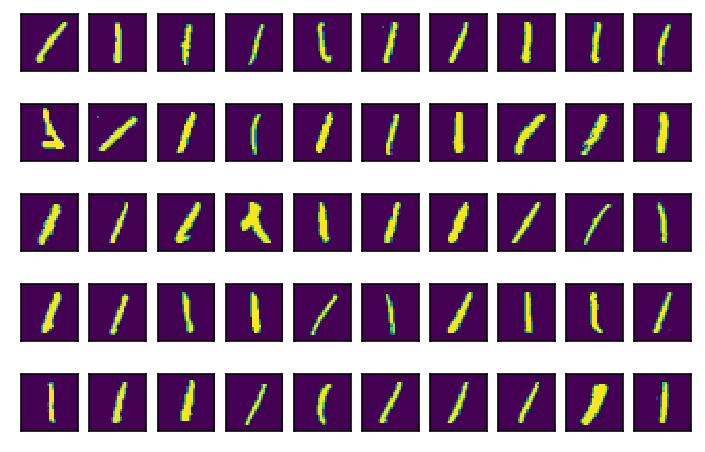

In [35]:
show_images_by_digit(1) # Try looking at a few other digits

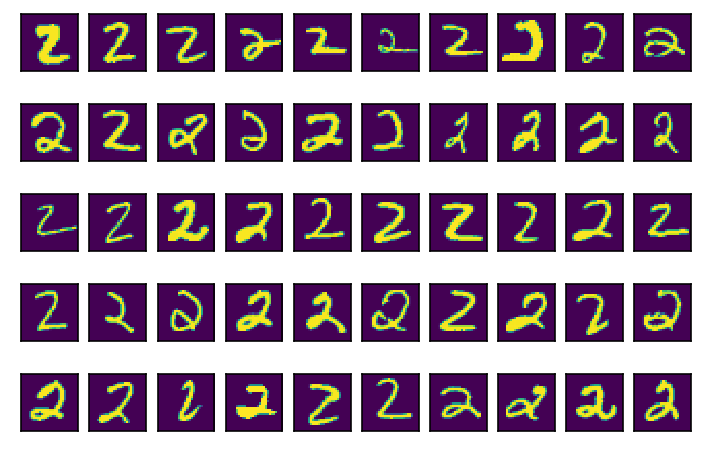

In [36]:
show_images_by_digit(2) # Try looking at a few other digits

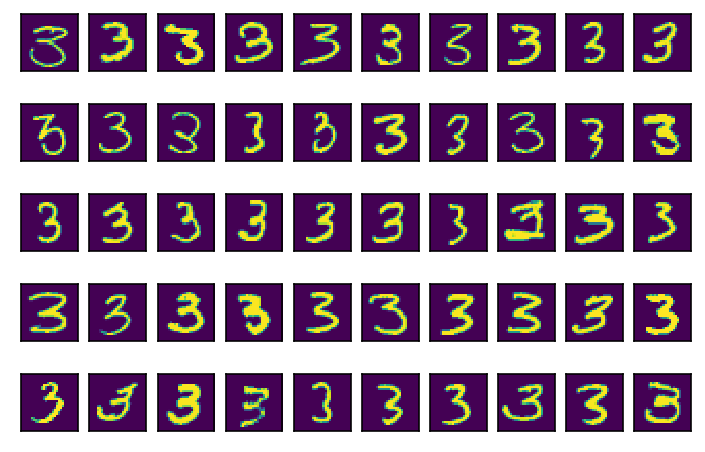

In [37]:
show_images_by_digit(3)

`4.` Now that you have had a chance to look through some of the data, you can try some different algorithms to see what works well to use the X matrix to predict the response well.  If you would like to use the function I used in the video regarding random forests, you can run the code below, but you might also try any of the supervised techniques you learned in the previous course to see what works best.

If you decide to put together your own classifier, remember the 4 steps to this process:

**I.** Instantiate your model. (with all the hyperparameter values you care about)

**II.** Fit your model. (to the training data)

**III.** Predict using your fitted model.  (on the test data)

**IV.** Score your model. (comparing the predictions to the actual values on the test data)

You can also try a grid search to see if you can improve on your initial predictions.

In [38]:
# Remove the tag to fit the RF model from the video, you can also try fitting your own!
fit_random_forest_classifier(X, y)

[[199   0   0   0   0   0  10   0   0   0]
 [  0 236   1   0   0   1   2   2   1   0]
 [  1   5 213   0   1   1   1   5   0   1]
 [  2   0   6 175   0   4   0   1   2   1]
 [  0   0   1   0 167   1   3   0   0   6]
 [  2   2   0   5   1 170   3   1   1   1]
 [  2   0   2   0   2   2 203   0   0   0]
 [  0   0   7   0   5   0   1 204   3   5]
 [  1   1   0   4   0   5   0   0 188   3]
 [  2   1   0   2  11   1   0   3   3 185]]
0.9322441134070159


0.9322441134070159

`5.` Now for the purpose of this lesson, to look at PCA.  In the video, I created a model just using two features.  Replicate the process below. You can use the same `do_pca` function that was created in the previous video.  Store your variables in **pca** and **X_pca**.

In [39]:
do_pca?

In [46]:
pca, X_pca = do_pca(n_components=int(np.sqrt(X.shape[1])), data=X)

`6.` The **X_pca** has reduced the original number of more than 700 features down to only 2 features that capture the majority of the variability in the pixel values.  Use the space below to fit a model using these two features to predict the written value.  You can use the random forest model by running `fit_random_forest_classifier` the same way as in the video. How well does it perform?

In [49]:
fit_random_forest_classifier(X_pca, y)

[[194   0   3   1   1   0   8   1   1   0]
 [  0 233   2   0   0   0   2   0   5   1]
 [  2   2 210   3   3   0   2   4   2   0]
 [  0   0   9 166   0   8   0   3   4   1]
 [  0   0   4   0 157   1   2   1   0  13]
 [  1   0   2   6   1 169   1   0   3   3]
 [  2   0   1   0   4   1 202   0   1   0]
 [  0   0   4   2   3   0   0 204   2  10]
 [  1   1   0  12   2   8   0   0 176   2]
 [  1   0   2   2  15   0   0  17   1 170]]
0.9038923594425757


0.9038923594425757

`7.` Now you can look at the separation of the values using the `plot_components` function.  If you plot all of the points (more than 40,000), you will likely not be able to see much of what is happening.  I recommend plotting just a subset of the data.  Which value(s) have some separation that are being predicted better than others based on these two components?

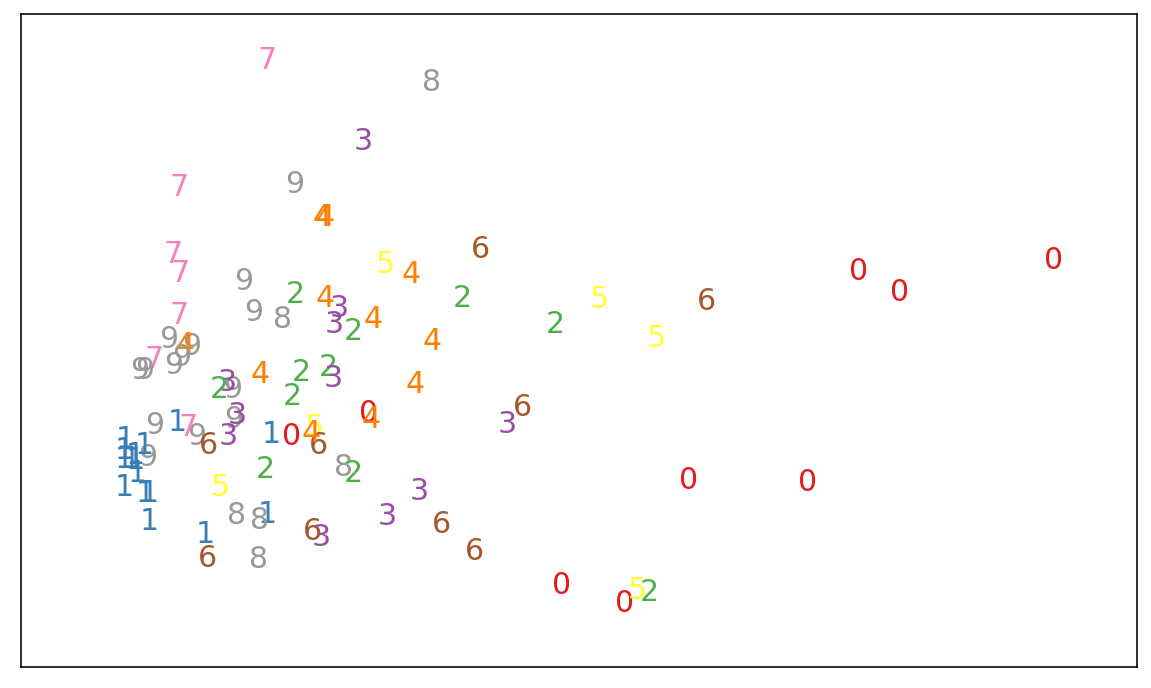

In [50]:
plot_components(X_pca[:100], y[:100])

In [51]:
pca, X_pca = do_pca(n_components=2, data=X)
fit_random_forest_classifier(X_pca, y)

[[108   0  38  10   8  13  24   0   8   0]
 [  0 209   0   4   1   8   4   5   8   4]
 [ 35   2  78  27  16  20  34   1  11   4]
 [ 11   2  32  23  23  25  27  12  24  12]
 [  5   5  16  21  49  18  15  14  10  25]
 [  8   8  29  19  17  26  32   3  34  10]
 [ 32   5  54  14  10  29  33   3  29   2]
 [  3   4   2   8  30  10   4  95   7  62]
 [  7   6  25  32  22  24  32   5  38  11]
 [  2  12   4  17  28  11   4  57  10  63]]
0.34694858241230175


0.34694858241230175

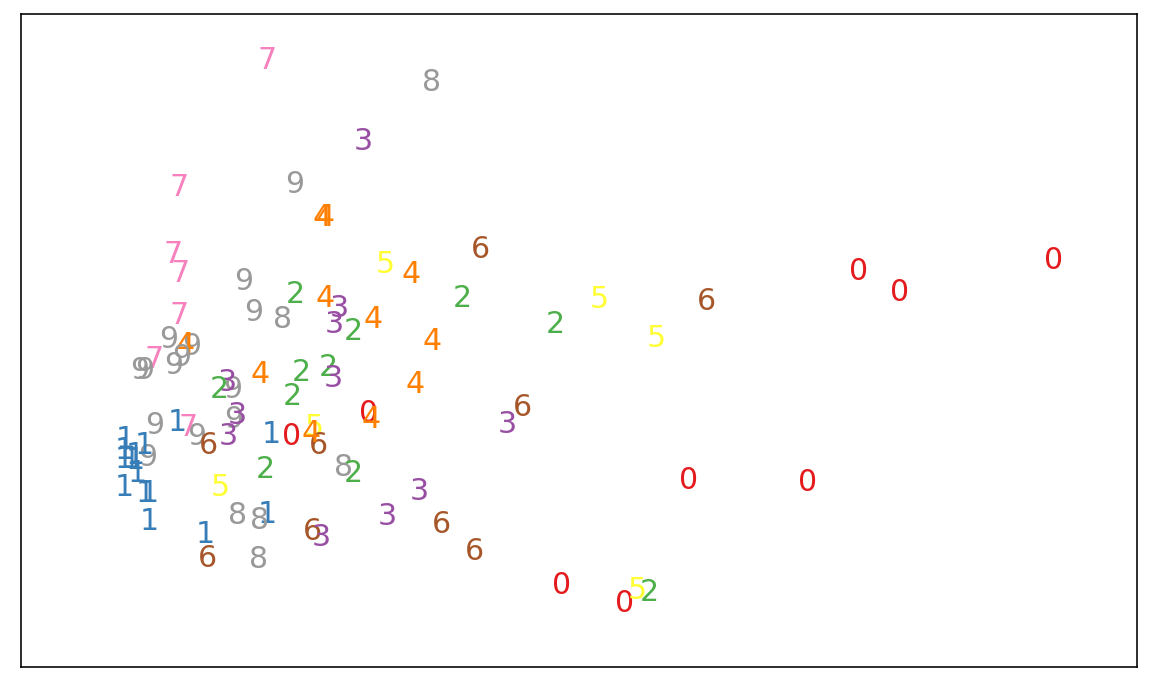

In [52]:
plot_components(X_pca[:100], y[:100])

`8.` See if you can find a reduced number of features that provides better separation to make predictions.  Say you want to get separation that allows for accuracy of more than 90%, how many principal components are needed to obtain this level of accuracy?  Were you able to substantially reduce the number of features needed in your final model?

In [53]:
for i in range(3,28):
    pca, X_pca = do_pca(n_components=i, data=X)
    value = fit_random_forest_classifier(X_pca, y)
    if value > 0.9:
        break
    print(i)

[[161   0   6   2   2   8  19   1  10   0]
 [  0 222   1   3   2   4   8   0   3   0]
 [ 17   3 127  29   4   3  39   0   5   1]
 [  3   3  58  59   5  15  26   3  15   4]
 [  7   0   4   5  99  16   1  13  10  23]
 [  9   0   9  15  22  64  27   6  26   8]
 [ 17   6  15  19   2   8 131   0  13   0]
 [  1   2   0   2  24   7   2 118  10  59]
 [ 16   3   8  23  26  45  33   1  45   2]
 [  2   2   1   2  44   4   1  54   9  89]]
0.5358000961076406
3
[[173   0   9   0   3  12   5   0   7   0]
 [  0 225   1   1   0   3   3   2   8   0]
 [ 13   1 160  11   4   8  27   0   2   2]
 [  3   0  21 126   0   9   3   0  28   1]
 [  6   0   4   1 127   1   6  12   1  20]
 [  7   0   7  25  14  83   3   6  31  10]
 [  4   0  27   0   3   3 173   0   1   0]
 [  3   4   3   1  22   6   0 133   9  44]
 [ 15   4   8  30   4  42   1   6  92   0]
 [  3   1   3   1  47   6   1  44   8  94]]
0.6660259490629505
4
[[181   0  11   0   5   4   4   0   4   0]
 [  0 229   2   1   0   3   2   1   5   0]
 [ 13   2 

[[195   0   2   1   0   1   7   1   1   1]
 [  0 232   2   1   0   2   2   0   4   0]
 [  2   2 207   5   1   0   3   3   3   2]
 [  0   0   9 161   0   9   1   1   6   4]
 [  0   0   5   0 155   1   3   3   0  11]
 [  1   0   2   6   1 164   2   0   6   4]
 [  3   0   2   0   3   1 201   0   1   0]
 [  0   1   5   2   3   0   0 198   3  13]
 [  0   1   2  13   2   8   0   0 175   1]
 [  3   0   1   2  14   1   0  12   2 173]]
0.8942815953868333
22
[[192   0   4   1   0   1   7   2   1   1]
 [  0 234   2   0   0   0   2   0   4   1]
 [  1   2 205   5   2   1   4   3   5   0]
 [  0   0   6 169   0   6   0   2   6   2]
 [  0   0   4   0 156   1   3   1   0  13]
 [  2   0   2   6   1 167   1   0   4   3]
 [  3   0   1   0   3   2 201   0   1   0]
 [  0   0   7   2   5   0   0 199   1  11]
 [  2   1   1  12   0   9   1   0 174   2]
 [  0   0   2   3  16   1   0  14   1 171]]
0.8976453628063431
23
[[195   0   4   1   0   0   6   1   1   1]
 [  0 233   2   0   0   0   2   0   5   1]
 [  3   

In [54]:
accs = []
comps = []
for comp in range(2, 100):
    comps.append(comp)
    pca, X_pca = do_pca(comp, X)
    acc = fit_random_forest_classifier2(X_pca, y)
    accs.append(acc)

Text(40, 0.9106198942815954, 'local max')

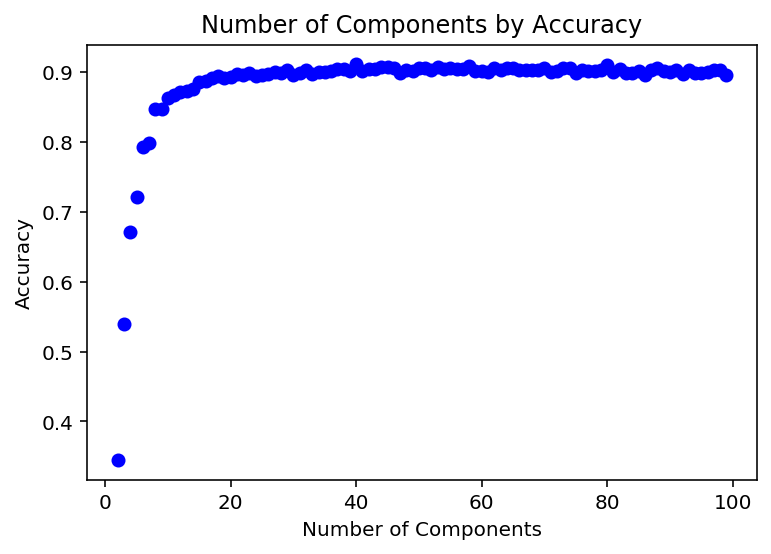

In [90]:
# fig, ax = plt.subplots()
# # ax.plot(x,y)

# ymax = max(accs)
# xpos = accs.index(ymax)
# xmax = comps[xpos]

# # ax.set_ylim(0,20)
# # plt.show()

plt.plot(comps, accs, 'bo');
plt.xlabel('Number of Components');
plt.ylabel('Accuracy');
plt.title('Number of Components by Accuracy');
ax.annotate('local max', xy=(xmax, ymax), xytext=(xmax, ymax))

In [88]:
# The max accuracy and corresponding number of components
np.max(accs), comps[np.where(accs == np.max(accs))[0][0]]

(0.9106198942815954, 40)

**Here you can see that the accuracy quickly levels off.  The maximum accuracy is actually acheived at 40 principal components.  Given the slight negative trend also indicates that the final components are mostly containing noise.  The 40 components here contain the information needed to be able to determine the images nearly to the same ability as using the entire image.  Next, let's take a closer look at exactly what other information we get from PCA, and how we can interpret it.** 

Now that you have seen a bit about how the PCA library works within scikit learn library and fit it to some hand written digits, we should take a closer look at what exactly PCA gives us back to work with and what these different parts mean.  Let's pick up where we left off in the last video.  Below I read in the libraries we used before, split off the image from the label, and I plotted the first 30 images in the dataset.

/Users/daiglechris/Git/Udacity/IntroductionToMachineLearningProgram/Part4_UnsupervisedLearning/Dimensionality Reduction and PCA/helper_functions.py:44: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  mat_data = X.iloc[digit_num].as_matrix().reshape(28,28)  #reshape images


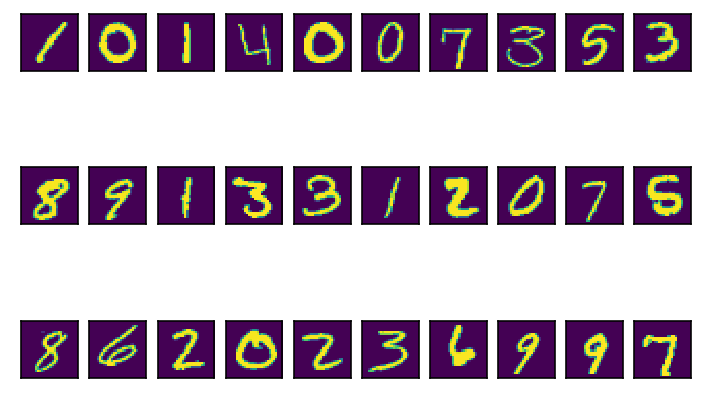

In [91]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from helper_functions import show_images, show_images_by_digit, fit_random_forest_classifier2 
from helper_functions import fit_random_forest_classifier, do_pca, plot_components

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#read in our dataset
train = pd.read_csv('./data/train.csv')
train.fillna(0, inplace=True)

# save the labels to a Pandas series target
y = train['label']
# Drop the label feature
train.fillna(0, inplace=True)
X = train.drop("label",axis=1)

show_images(30)

Now let's fit PCA with 15 components, and take a look at a few of the main features that live on the pca object we get back.

In [92]:
pca, X_pca = do_pca(15, X)

One of the main features to consider is something called the explained_variance_ratio.  I created what's known as a scree_plot to show the explained_variance_ratio for each of the 15 components.

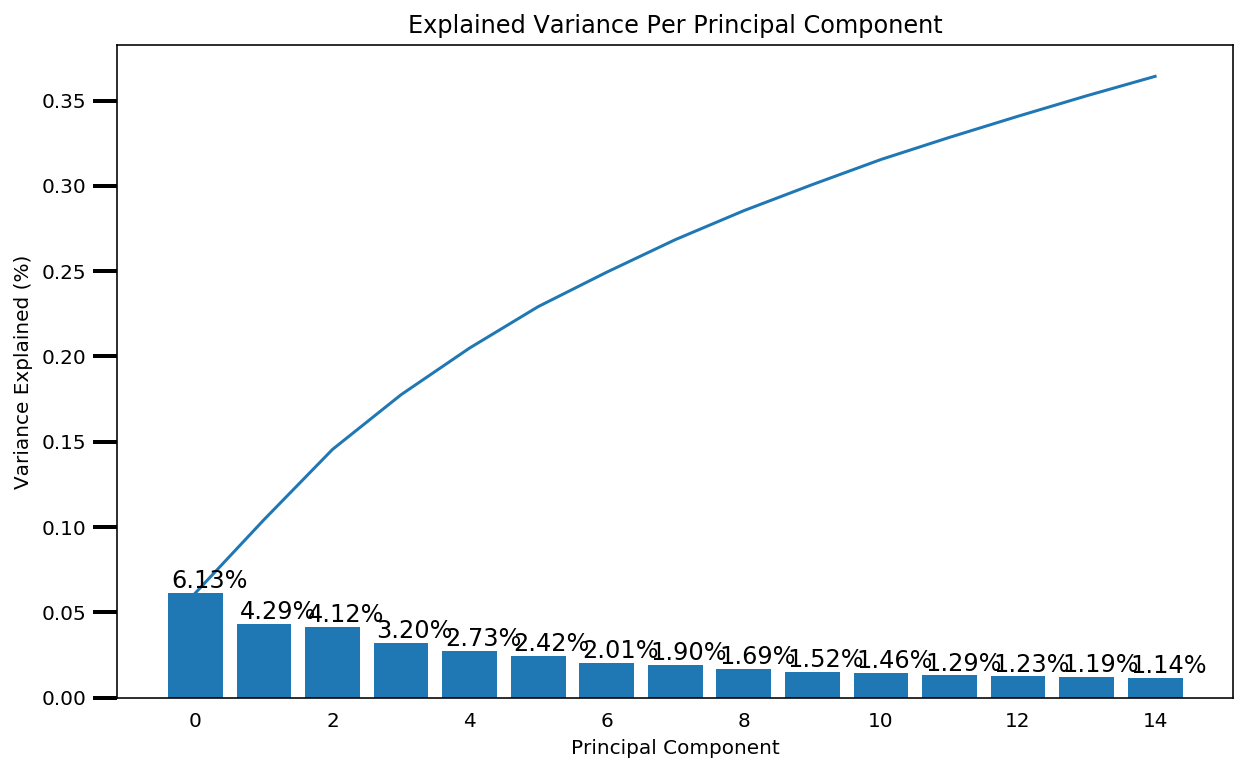

In [93]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)

Each of the bars represents the amount of variability explained by each component.  So you can see the first component explains 5.74% of the variability in the image data.  The second explains 4.11% of the variability and so on.  Often the number of components is chosen based on the total amount of variability explained by the components.  You can see that by using 15 components, we capture almost 35% of the total variability in the images.

Let's see if we can get a better idea of what aspects of the image the components might be picking up on.  To do this we will work with the components_ attribute of the pca object.  Looking at the shape of components shows us that each component gives the weights for each pixel.Each of the bars represents the amount of variability explained by each component.  So you can see the first component explains 5.74% of the variability in the image data.  The second explains 4.11% of the variability and so on.  Often the number of components is chosen based on the total amount of variability explained by the components.  You can see that by using 15 components, we capture almost 35% of the total variability in the images.

Let's see if we can get a better idea of what aspects of the image the components might be picking up on.  To do this we will work with the components_ attribute of the pca object.  Looking at the shape of components shows us that each component gives the weights for each pixel.

In [94]:
pca.components_.shape

(15, 784)

I created a function below to plot the weights of each component in the form of the images.  The darker portions of the image show

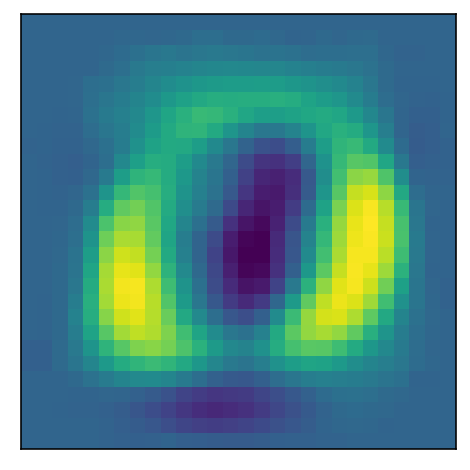

In [96]:

def plot_component(pca, comp):
    '''
    Plots an image associated with each component to understand how the weighting 
    of the components 
    INPUT: 
          pca - pca object created from PCA in sklearn
          comp - int - the component you want to see starting at 0
    OUTPUT
          None
    '''
    if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28,28)  #reshape images
        plt.imshow(mat_data); #plot the data
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) #removes numbered labels on y-axis   
    else:
        print('That is not the right input, please read the docstring before continuing.')
        
#Plot the first component
plot_component(pca, 0)

Looking at this image, it makes sense that only using two components was able to separate zero better than other digits when looking at this image.  The highest weights are associated with pixels that look a lot like a zero.

Now, it is your turn!

### Your Turn!

In the last video, you saw two of the main aspects of principal components:

1. **The amount of variability captured by the component.**
2. **The components themselves.**

In this notebook, you will get a chance to explore these a bit more yourself.  First, let's read in the necessary libraries, as well as the data.

/Users/daiglechris/Git/Udacity/IntroductionToMachineLearningProgram/Part4_UnsupervisedLearning/Dimensionality Reduction and PCA/helper_functions.py:44: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  mat_data = X.iloc[digit_num].as_matrix().reshape(28,28)  #reshape images


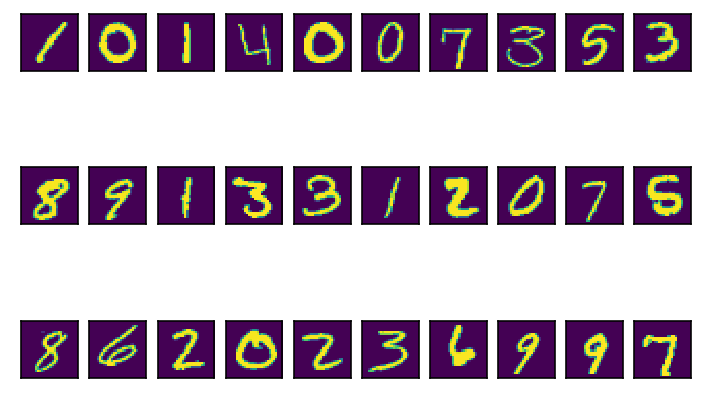

In [97]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from helper_functions import show_images, do_pca, scree_plot, plot_component
import test_code as t

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#read in our dataset
train = pd.read_csv('./data/train.csv')
train.fillna(0, inplace=True)

# save the labels to a Pandas series target
y = train['label']
# Drop the label feature
X = train.drop("label",axis=1)

show_images(30)

`1.` Perform PCA on the **X** matrix using on your own or using the **do_pca** function from the **helper_functions** module. Reduce the original more than 700 features to only 10 principal components.

In [98]:
pca, X_pca = do_pca(10, X)

`2.` Now use the **scree_plot** function from the **helper_functions** module to take a closer look at the results of your analysis.

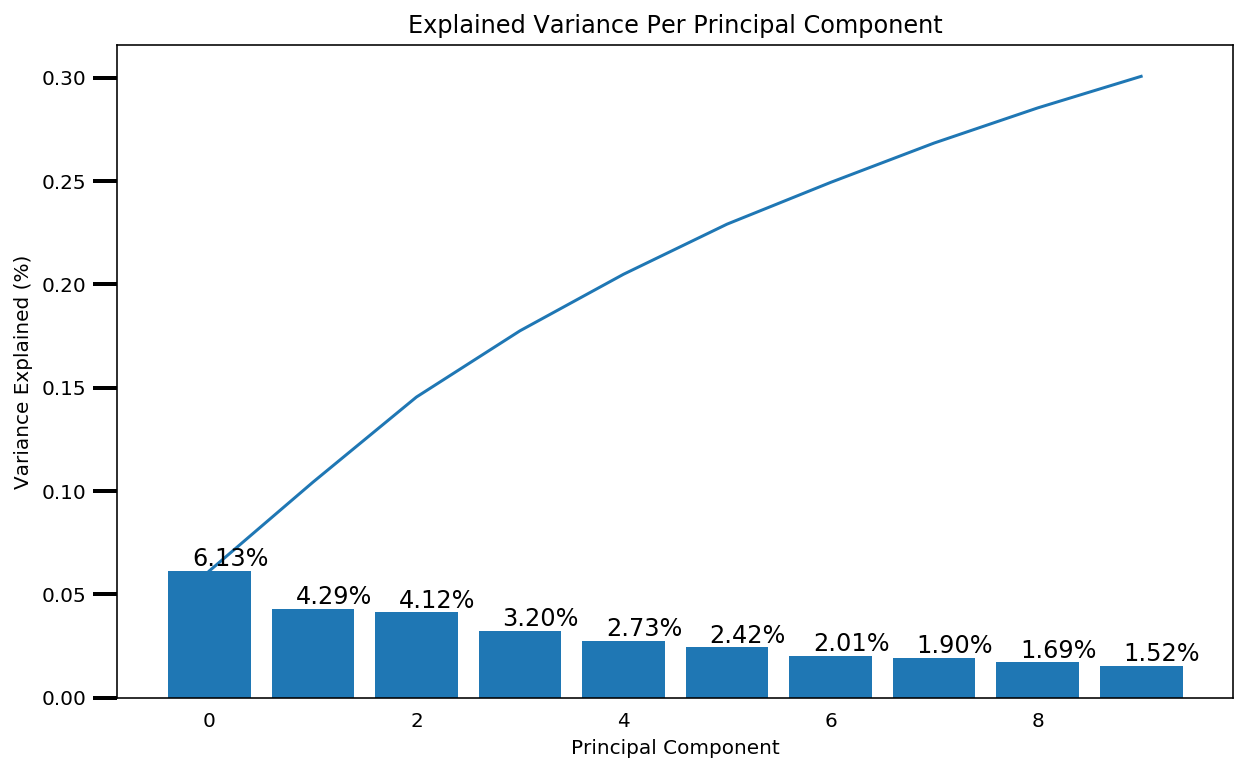

In [99]:
scree_plot(pca)

`3.` Using the results of your scree plot, match each letter as the value to the correct key in the **solution_three** dictionary.  Once you are confident in your solution run the next cell to see if your solution matches ours.

In [103]:
a = True
b = False
c = 6.13
d = 'The total amount of variability in the data explained by the first two principal components'
e = None

solution_three = {
    '10.42' : d, 
    'The first component will ALWAYS have the most amount of variability explained.': a,
    'The total amount of variability in the data explained by the first component': c,
    'The sum of the variability explained by all the components can be greater than 100%': b
}
t.question_3_check(solution_three)

Looks good!  The amount of variability explained by each principal component gives us an idea of how much of the original variability in the original data is retained by each component.  Nice job matching these up!


`4.` Use the **plot_component** function from the **helper_functions** module to look at each of the components (remember they are 0 indexed).  Use the results to assist with question 5.

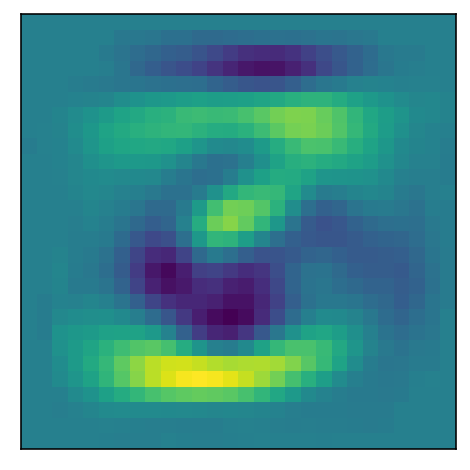

In [108]:
plot_component(pca, 3)

`5.` Using the results from viewing each of your principal component weights in question 4, change the following values of the **solution_five** dictionary to the **number of the index** for the principal component that best matches the description.  Once you are confident in your solution run the next cell to see if your solution matches ours.

In [110]:
solution_five = {
    'This component looks like it will assist in identifying zero': 0,
    'This component looks like it will assist in identifying three': 3
}
t.question_5_check(solution_five)

Nice job!  That matches our solution as well!  The index of the first principal component appears to have really high weights where a zero would appear.  Alternatively, the fourth (third indexed component) appears to downweight where a three would appear to make it stand out.


From this notebook, you have had an opportunity to look at the two major parts of PCA:

`I.` The amount of **variance explained by each component**.  This is called an **eigenvalue**.

`II.` The principal components themselves, each component is a vector of weights.  In this case, the principal components help us understand which pixels of the image are most helpful in identifying the difference between between digits. **Principal components** are also known as **eigenvectors**.

# Eigen Values and Eigen Vectors
The mathematics of PCA isn't really necessary for PCA to be useful. However, it can be useful to fully understand the mathematics of a technique to understand how it might be extended to new cases. For this reason, the page has a few additional references which go more into the mathematics of PCA.

A simple introduction of what PCA is aimed to accomplish is provided [here in a simple example.](https://www.youtube.com/watch?v=HH8pouRwphA)

A nice visual, and mathematical, illustration of PCA is provided in [this video by 3 blue 1 brown.](https://www.youtube.com/watch?v=PFDu9oVAE-g)

If you dive into the literature surrounding PCA, you will without a doubt run into the language of eigenvalues and eigenvectors. These are just the math-y words for things you have already encountered in this lesson.

An eigenvalue is the same as the amount of variability captured by a principal component, and an eigenvector is the principal component itself. To see more on these ideas, take a look at the following three links below:

[A great introduction into the mathematics of principal components analysis.](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf)

[An example of using PCA in python by one of my favorite data scientists.](https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)

[An example of PCA from the scikit learn documentation.](http://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py)

# When to use PCA
In general, PCA is used to reduce the dimensionality of your data. Here are links to some specific use cases beyond what you covered in this lesson:

`1.` PCA for [microarray data.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2669932/)
`2.` PCA for [anomaly detection.](https://arxiv.org/pdf/1801.01571.pdf)
`3.` PCA for [time series data.](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.853.2380&rep=rep1&type=pdf)

If you ever feel overwhelmed by the amount of data you have, you can look to PCA to reduce the size of your dataset, while still retaining the maximum amount of information (though this does often come at the cost of reducing your data interpretability).

# Mini Project

### PCA Mini Project

In the lesson, you saw how you could use PCA to substantially reduce the dimensionality of the handwritten digits.  In this mini-project, you will be using the **cars.csv** file.  

To begin, run the cell below to read in the necessary libraries and the dataset.  I also read in the helper functions that you used throughout the lesson in case you might find them helpful in completing this project.  Otherwise, you can always create functions of your own!

In [112]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from helper_functions import do_pca, scree_plot, plot_components, pca_results
from IPython import display
import test_code2 as t

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv('./data/cars.csv')

`1.` Now your data is stored in **df**.  Use the below cells to take a look your dataset.  At the end of your exploration, use your findings to match the appropriate variable to each key in the dictionary below.  

In [113]:
df.head()

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68


In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sports,387.0,0.116279,0.320974,0.0,0.0,0.0,0.0,1.0
SUV,387.0,0.152455,0.359926,0.0,0.0,0.0,0.0,1.0
Wagon,387.0,0.072351,0.259404,0.0,0.0,0.0,0.0,1.0
Minivan,387.0,0.054264,0.226830,0.0,0.0,0.0,0.0,1.0
Pickup,387.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
AWD,387.0,0.201550,0.401677,0.0,0.0,0.0,0.0,1.0
RWD,387.0,0.242894,0.429387,0.0,0.0,0.0,0.0,1.0
Retail,387.0,33231.180879,19724.634576,10280.0,20997.0,28495.0,39552.5,192465.0
Dealer,387.0,30440.653747,17901.179282,9875.0,19575.0,26155.0,36124.0,173560.0
Engine,387.0,3.127390,1.014314,1.4,2.3,3.0,3.8,6.0


In [115]:
df.shape

(387, 18)

In [116]:
a = 7
b = 66
c = 387
d = 18
e = 0.23
f = 0.05

solution_1_dict = {
    'The number of cars in the dataset': c,
    'The number of car features in the dataset': d,
    'The number of dummy variables in the dataset': a,
    'The proportion of minivans in the dataset': f,
    'The max highway mpg for any car': b
}
# Check your solution against ours by running this cell
display.HTML(t.check_question_one(solution_1_dict))

Nice job!  Looks like your dataset matches what we found!


`2.` There are some particularly nice properties about PCA to keep in mind.  Use the dictionary below to match the correct variable as the key to each statement.  When you are ready, check your solution against ours by running the following cell.

In [118]:
a = True
b = False

solution_2_dict = {
    'The components span the directions of maximum variability.': a,
    'The components are always orthogonal to one another.': a,
    'Eigenvalues tell us the amount of information a component holds': a
}
# Check your solution against ours by running this cell
t.check_question_two(solution_2_dict)

That's right these are all true.  Principal components are orthogonal, span the directions of maximum variability, and the corresponding eigenvalues tell us how much of the original variability is explained by each component.


`3.` Fit PCA to reduce the current dimensionality of the datset to 3 dimensions.  You can use the helper functions, or perform the steps on your own.  If you fit on your own, be sure to standardize your data.  At the end of this process, you will want an X matrix with the reduced dimensionality to only 3 features.  Additionally, you will want your **pca** object back that has been used to fit and transform your dataset. 

In [119]:
pca, df_pca = do_pca(3, df)

`4.` Once you have your pca object, you can take a closer look at what comprises each of the principal components.  Use the **pca_results** function from the **helper_functions** module assist with taking a closer look at the results of your analysis.  The function takes two arguments: the full dataset and the pca object you created.

,Explained Variance,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Dimension 1,0.4352,-0.0343,-0.1298,0.0289,-0.0481,-0.0,-0.0928,-0.1175,-0.2592,-0.2576,-0.3396,-0.3263,-0.3118,0.3063,0.3061,-0.3317,-0.2546,-0.2414,-0.2886
Dimension 2,0.1667,0.4420,-0.2261,-0.0106,-0.2074,-0.0,-0.1447,0.3751,0.3447,0.3453,0.0022,0.0799,0.2342,0.0169,0.0433,-0.1832,-0.3066,-0.2701,-0.2163
Dimension 3,0.1034,0.0875,0.4898,0.0496,-0.2818,-0.0,0.5506,-0.2416,0.0154,0.0132,-0.0489,-0.0648,0.0040,-0.1421,-0.2486,0.0851,-0.2846,-0.3361,-0.1369


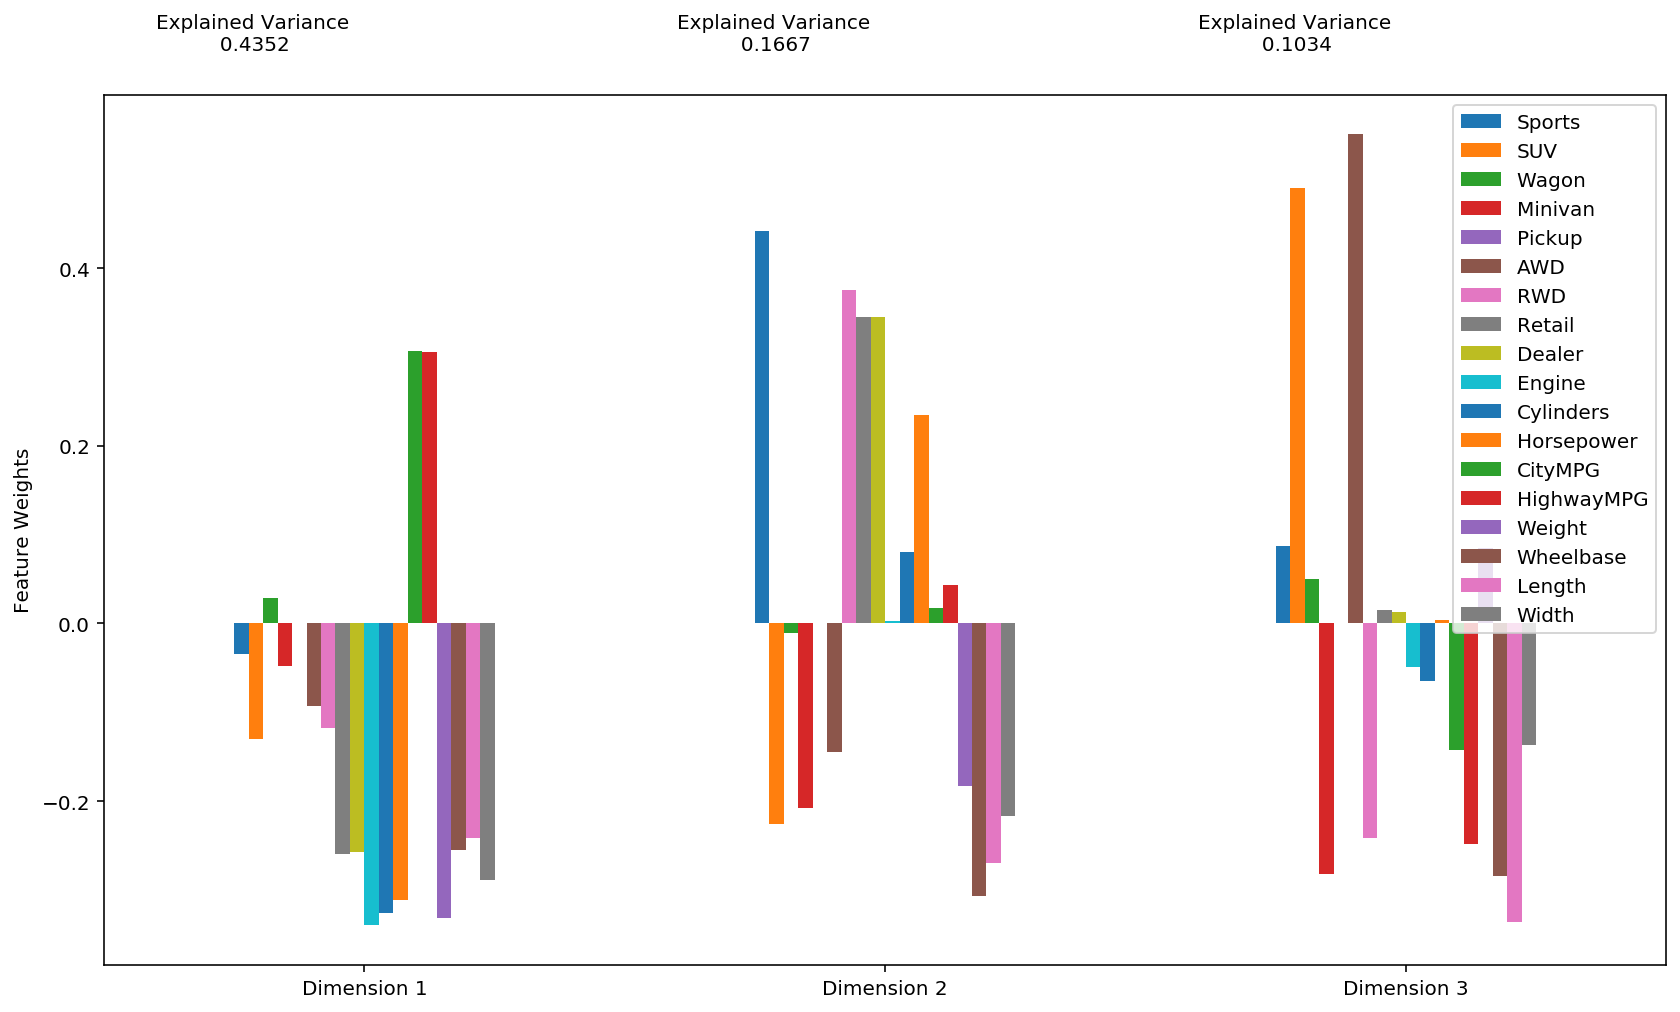

In [120]:
pca_results(df, pca)

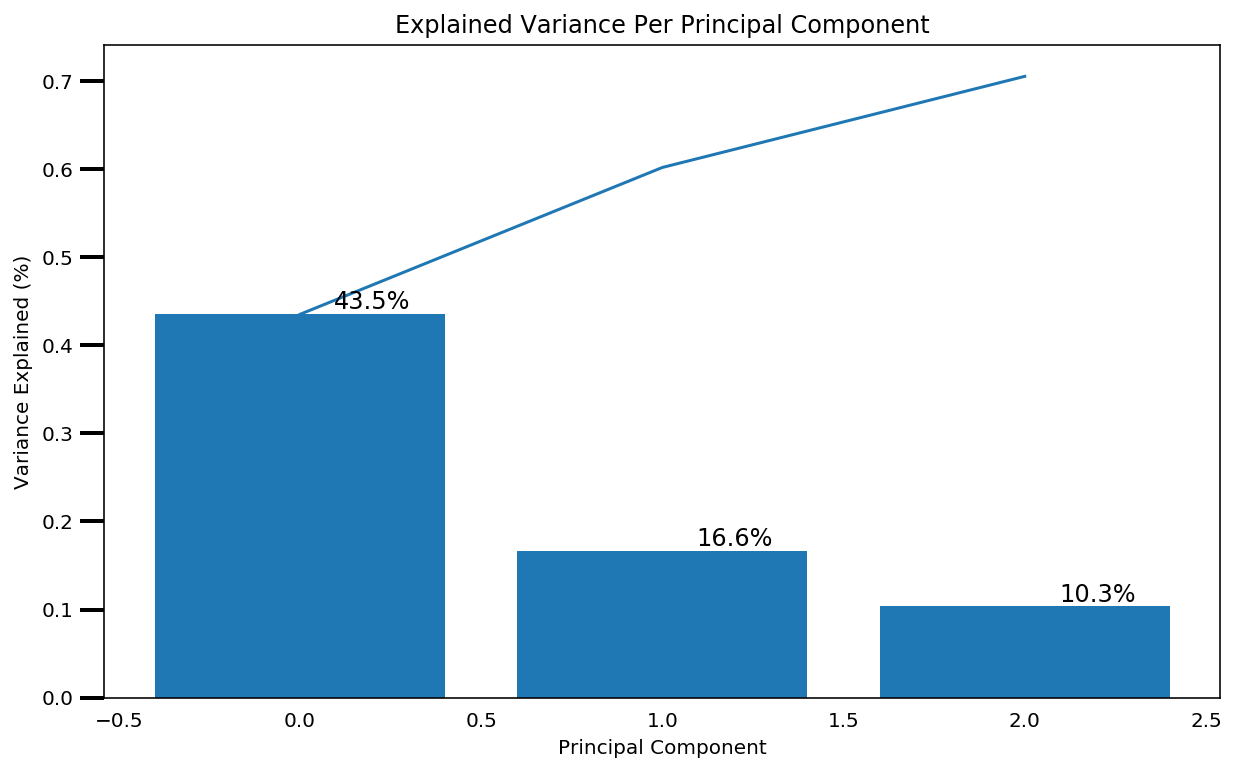

In [121]:
scree_plot(pca)

`5.` Use the results, to match each of the variables as the value to the most appropriate key in the dictionary below.  When you are ready to check your answers, run the following cell to see if your solution matches ours!

In [122]:
a = 'car weight'
b = 'sports cars'
c = 'gas mileage'
d = 0.4352
e = 0.3061
f = 0.1667
g = 0.7053

solution_5_dict = {
    'The first component positively weights items related to': c, 
    'The amount of variability explained by the first component is': d,
    'The largest weight of the second component is related to': b,
    'The total amount of variability explained by the first three components': g
}
# Run this cell to check if your solution matches ours.
t.check_question_five(solution_5_dict)

That's right!  Looks like you know a lot about PCA!


`6.` How many components need to be kept to explain at least 85% of the variability in the original dataset?  When you think you have the answer, store it in the variable `num_comps`.  Then run the following cell to see if your solution matches ours!

Using 6 components, we can explain 0.8682000000000001% of the variability in the original data.


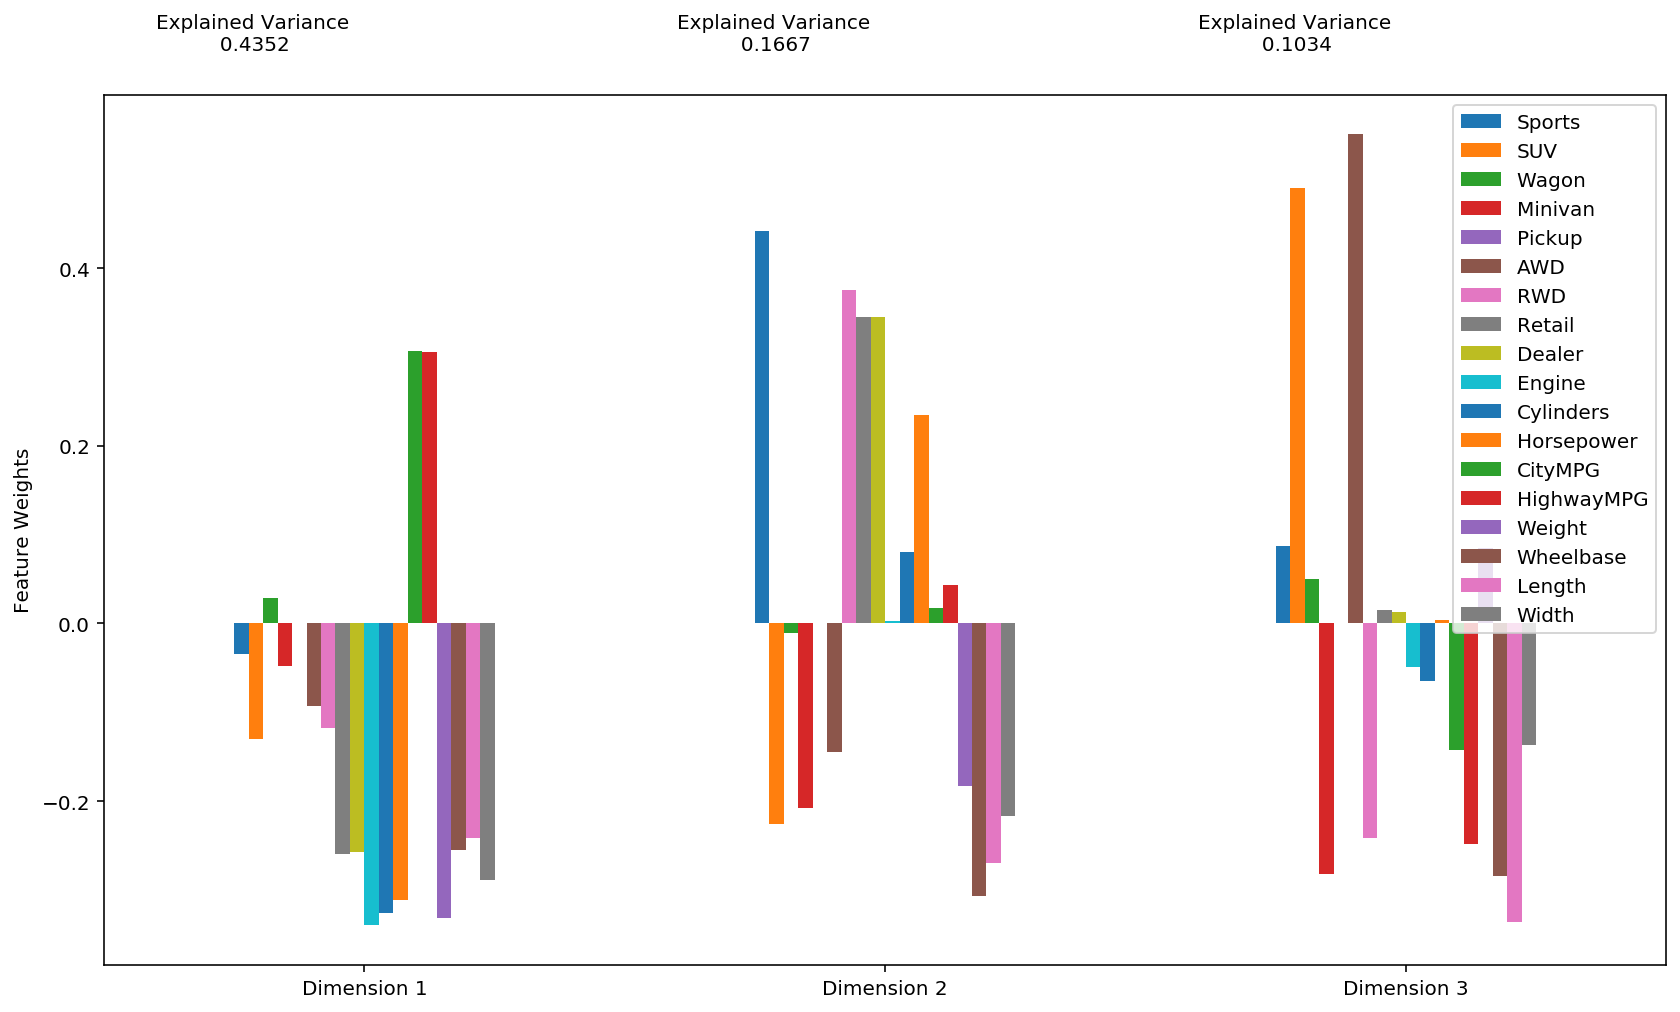

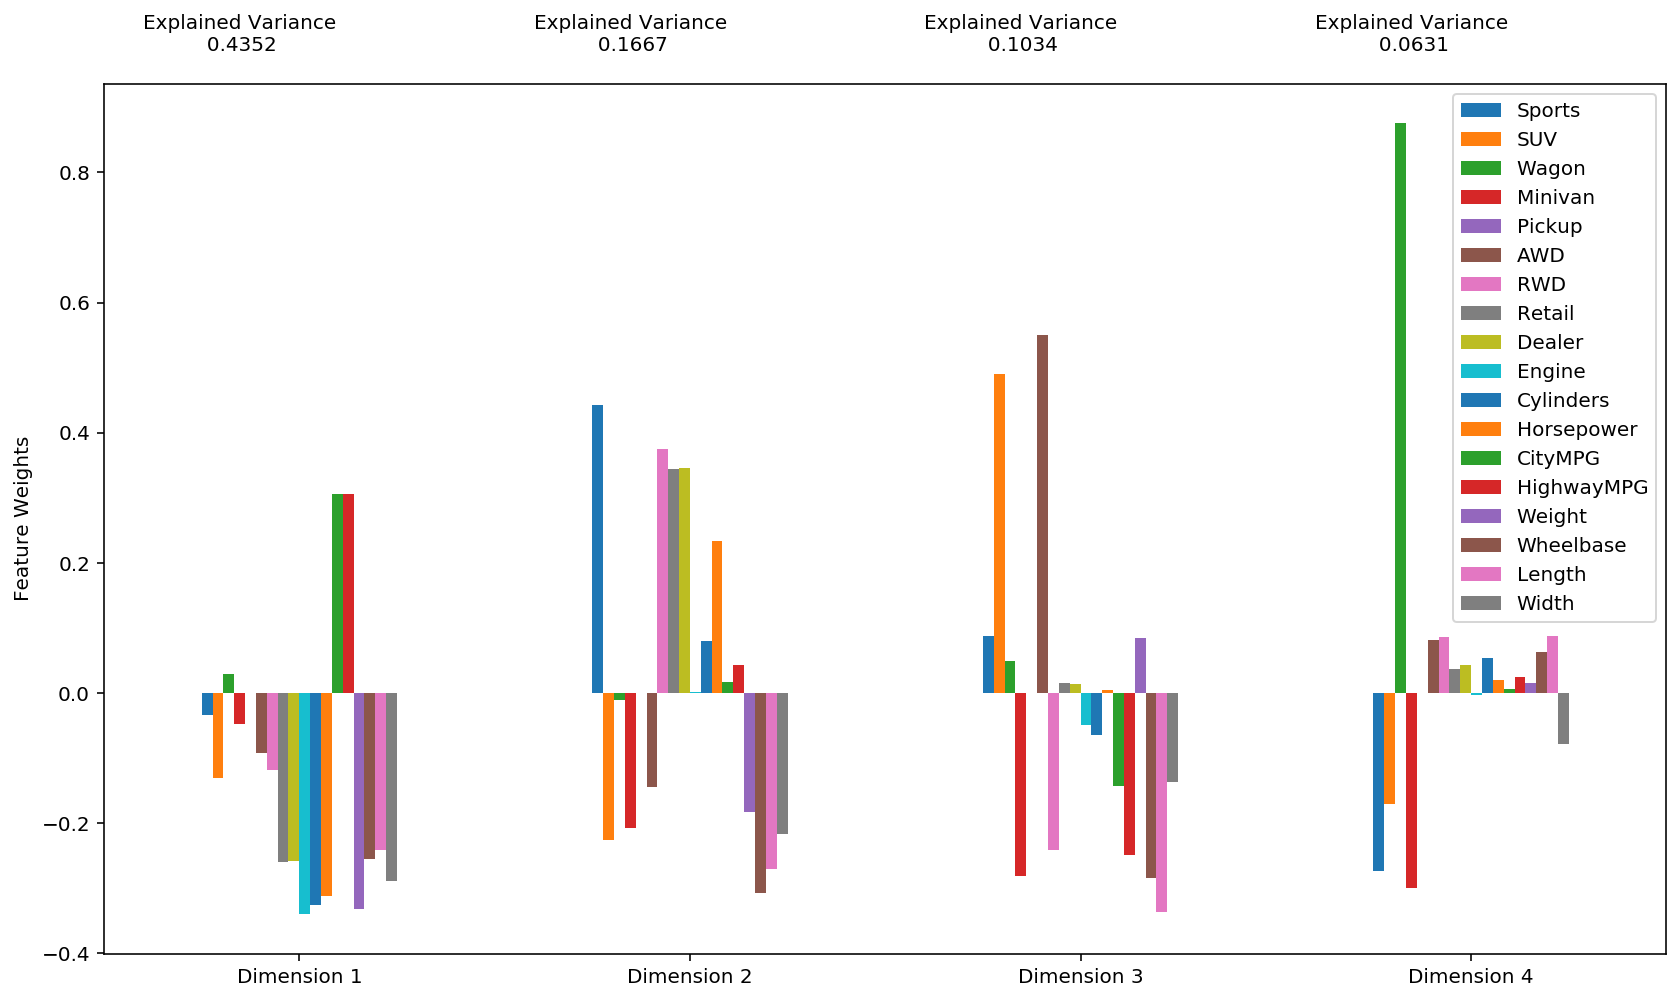

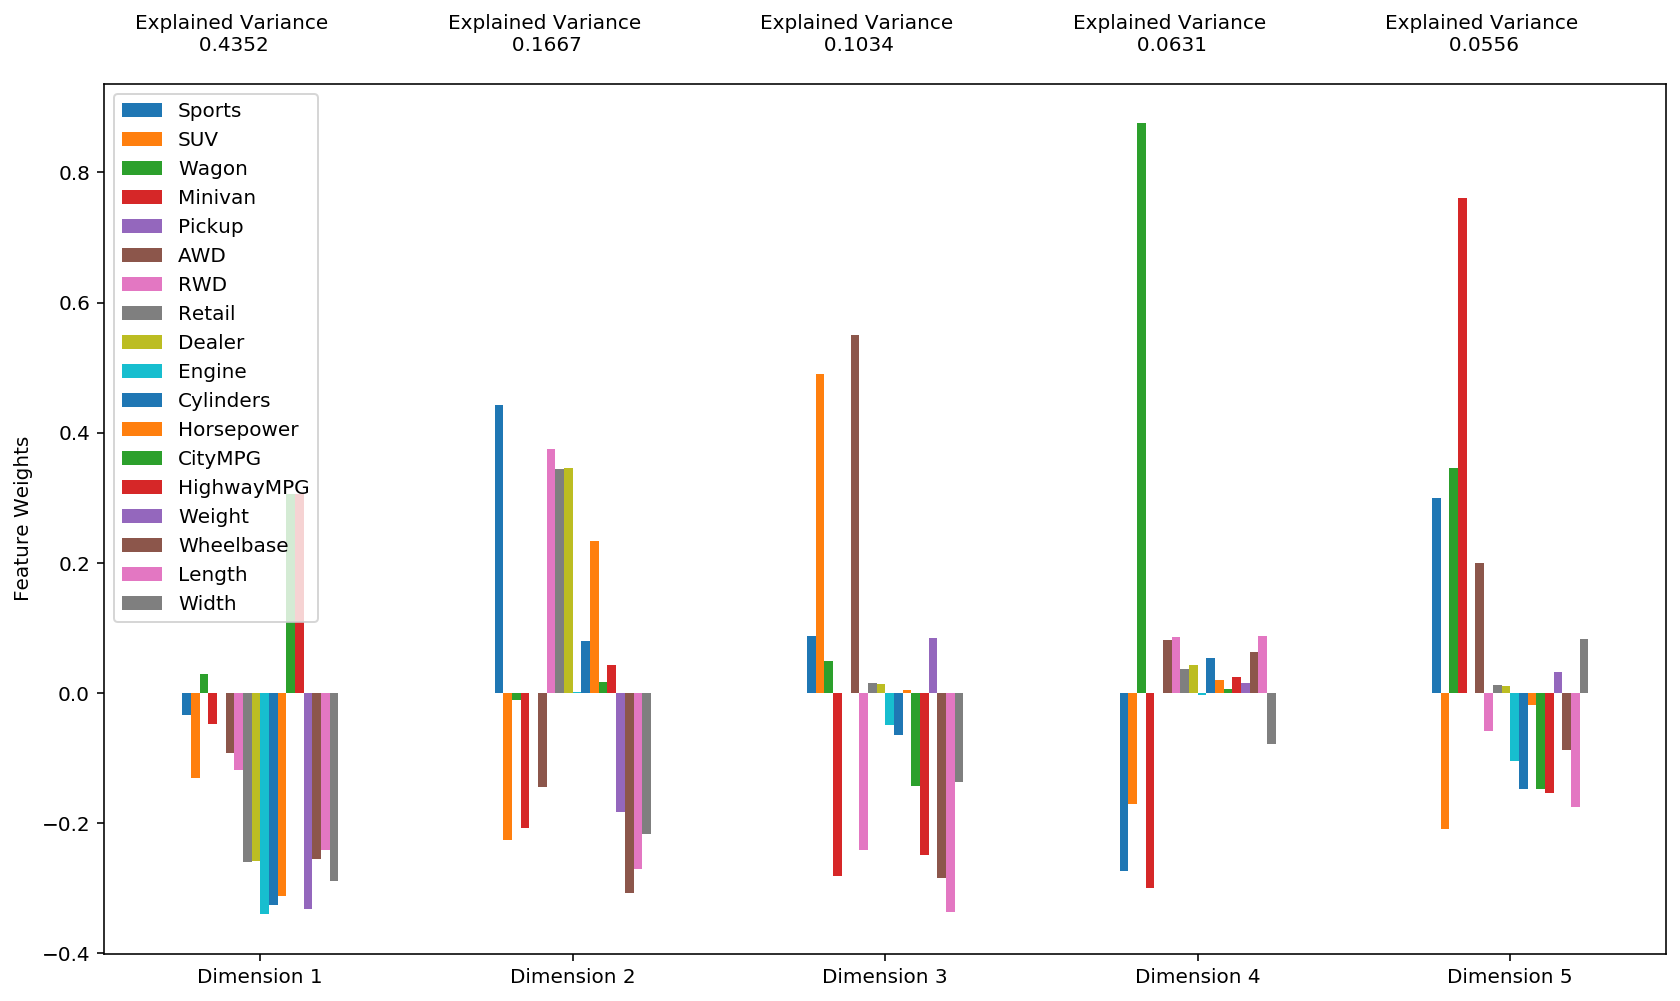

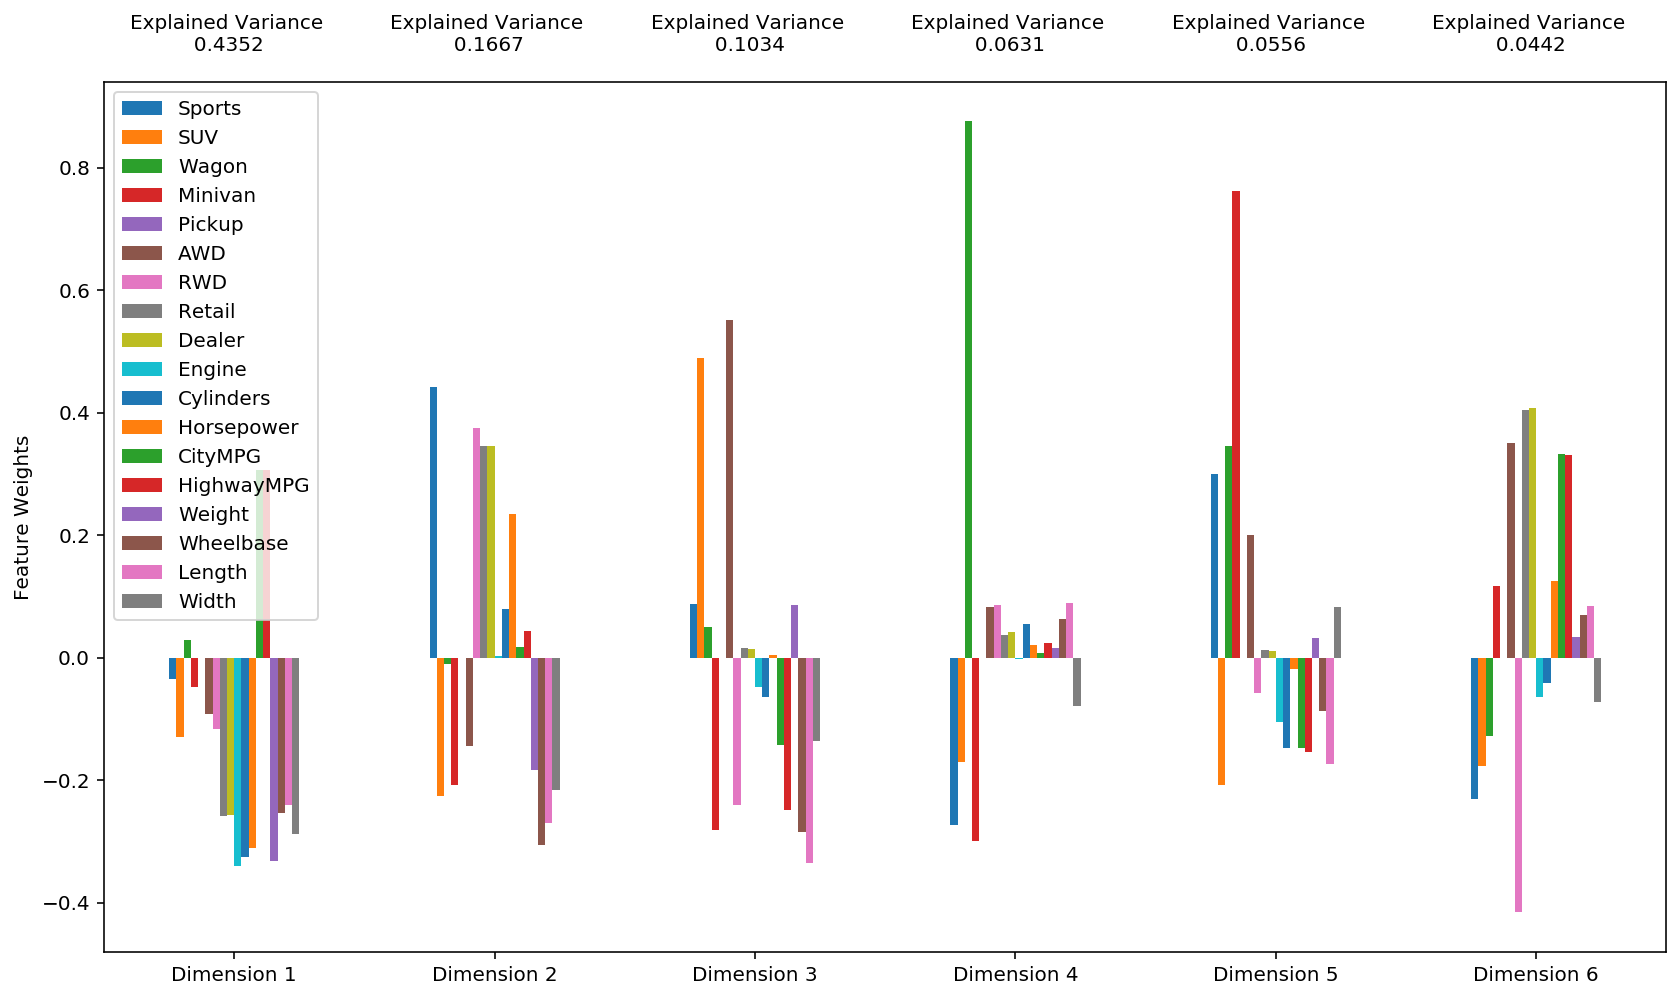

In [125]:
for comp in range(3, df.shape[1]):
    pca, X_pca = do_pca(comp, df)
    comp_check = pca_results(df, pca)
    if comp_check['Explained Variance'].sum() > 0.85:
        break
        

num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(comp_check.shape[0],comp_check['Explained Variance'].sum()))

In [126]:
#Code to find number of components providing more than 
# 85% of variance explained

num_comps = 6
# Now check your answer here to complete this mini project!
display.HTML(t.question_check_six(num_comps))

Nice job!  That's right!  With 6 components, you can explain more than 85% of the variability in the original dataset.


# Recap

Dimensionality Reduction and PCA - Lesson Topics

1. Two Methods for Dimensionality Reduction
You learned that **Feature Selection** and **Feature Extraction** are two general approaches for reducing the number of features in your data.

> Feature Selection processes result in a subset of the most significant original features in the data, while 

> Feature Extraction methods like PCA construct new latent features that well represent the original data.

2. Dimensionality Reduction and Principal Components
You learned that Principal Component Analysis (PCA) is a technique that is used to reduce the dimensionality of your dataset.

> The reduced features are called principal components, or latent features.

> These principal components are simply a linear combination of the original features in your dataset.

**You learned that these components have two major properties:**

> `1.` They aim to capture the most amount of variability in the original dataset.

> `2.` They are orthogonal to (independent of) one another.

3. Fitting PCA
Once you got the gist of what PCA was doing, we used it on handwritten digits within scikit-learn.

> We did this all within a function called `do_pca`, which returned the PCA model, as well as the reduced feature matrix. You simply passed in the number of features you wanted back, as well as the original dataset.

4. Interpreting Results
You then saw there are two major parts to interpreting the PCA results:

> `1.` The **variance explained** by each component. You were able to visualize this with scree plots to understand how many components you might keep based on how much information was being retained.

> `2.` The **principal components** themselves, which gave us an idea of which original features were most related to why a component was able to explain certain aspects about the original datasets.

5. Mini-project
Finally, you applied PCA to a dataset on vehicle information. You gained valuable experience using scikit-learn, as well as interpreting the results of PCA.

With mastery of these skills, you are now ready to use PCA for any task in which you feel it may be useful. If you have a large amount of data, and are feeling afflicted by the curse of dimensionality, you want to reduce your data to a smaller number of latent features, and you know just the way to do it!

6. Do you think you understand PCA well enough yet to explain it in a way that would make sense to your grandmother?
Here is an interesting StackExchange post that does just that, and with animated graphics! https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues